In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
examples_path = os.path.join("test_videos", "examples")
results_path = os.path.join("test_videos", "results")
results_arrays_path = os.path.join("test_videos", "results_arrays")

In [14]:
def plot_figs(required):
    assert required in ("t1", "t2", "p1", "p2")

    plt.figure(figsize=(20, 20))
    for i in range(1,8):

        tilts_1 = f"{results_arrays_path}\\1\\{i}_tilts_1.npy"
        tilts_2 = f"{results_arrays_path}\\1\\{i}_tilts_2.npy"
        pans_1 = f"{results_arrays_path}\\1\\{i}_pans_1.npy"
        pans_2 = f"{results_arrays_path}\\1\\{i}_pans_2.npy"

        tilts_1 = np.load(tilts_1)
        tilts_2 = np.load(tilts_2)
        pans_1 = np.load(pans_1)
        pans_2 = np.load(pans_2)
        
        if required == "t1":
            arr = tilts_1
        elif required == "p1":
            arr = pans_1
        elif required == "t2":
            arr = tilts_2
        elif required == "p2":
            arr = pans_2


        plt.subplot(7, 2, 2 * i - 1)
        plt.scatter(list(range(len(arr))), arr, color="b", alpha=0.5)
        plt.xlabel("nth Frame")
        if 't' in required:
            plt.ylabel("Tilt (degrees)")
        else:
            plt.ylabel("Pan (degrees)")
        bottom, top = plt.ylim()
        plt.ylim(bottom, top)
        left, right = plt.xlim()

        plt.subplot(7, 2, 2*i)
        differences = np.ediff1d(arr, to_begin=0, to_end=0)
        plt.scatter(list(range(len(differences))), differences, color='r',alpha=0.5)
        plt.xlabel("nth Frame")
        if 't' in required:
            plt.ylabel("Tilt (degrees)")
        else:
            plt.ylabel("Diffenrence in Pan (degrees)")
        bottom, top = plt.ylim()
        plt.ylim(bottom, top)
        left, right = plt.xlim()

    plt.show()

# Intervals

1. 7-9 seconds => 200-300 Frame
2. nan seconds => nan Frame
3. 9-11 seconds => 250-350 Frame
4. 13-15 seconds => 390-450 Frame
5. 5- seconds => 150- Frame
6. 11-14 seconds => 350-420 Frame
7. 9-11 seconds => 250-350 Frame


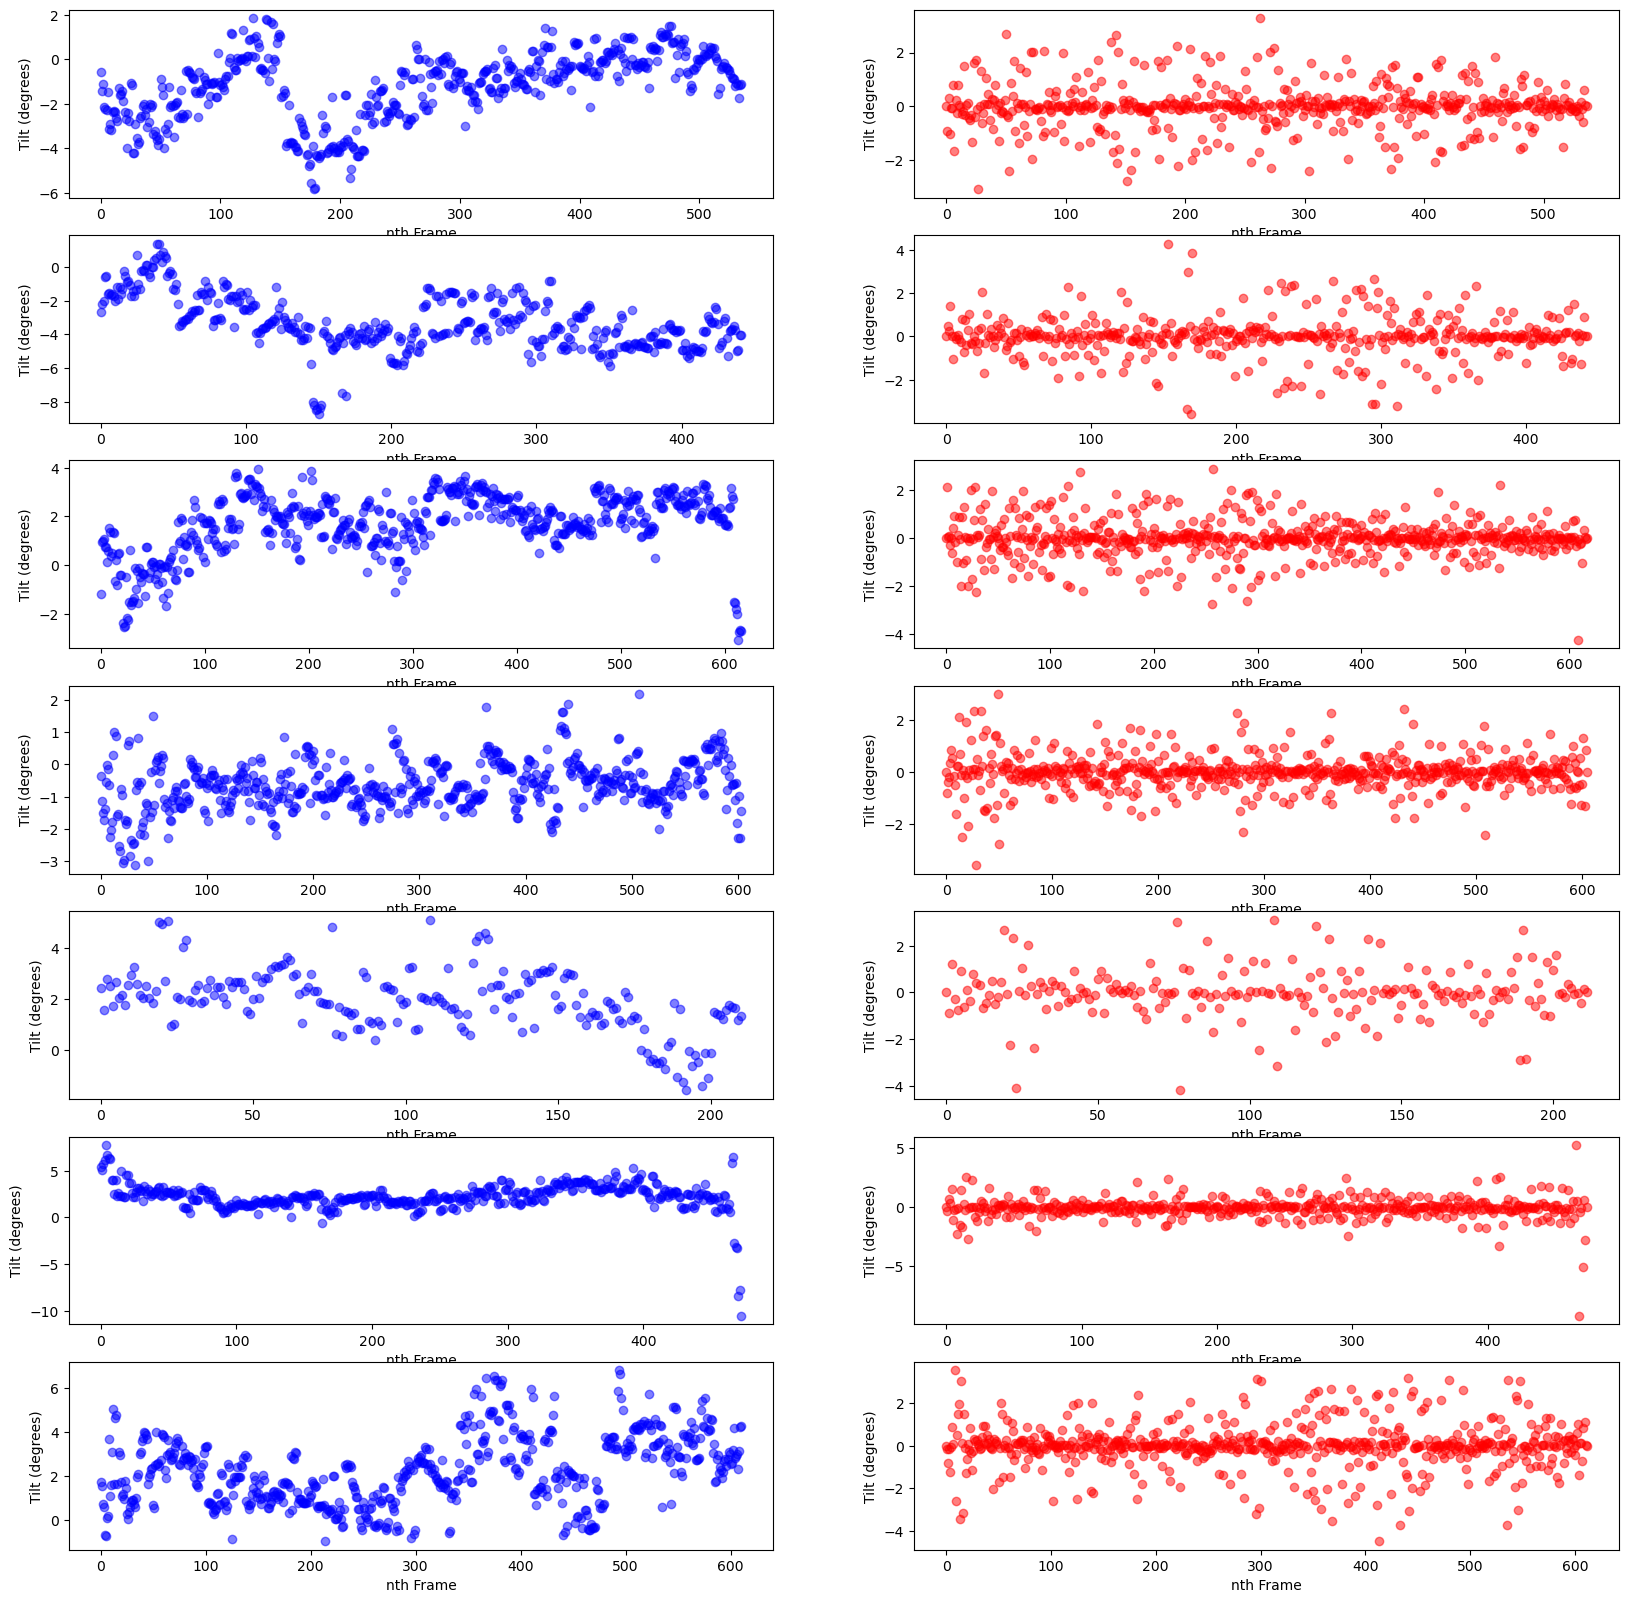

In [15]:
plot_fig("t1")

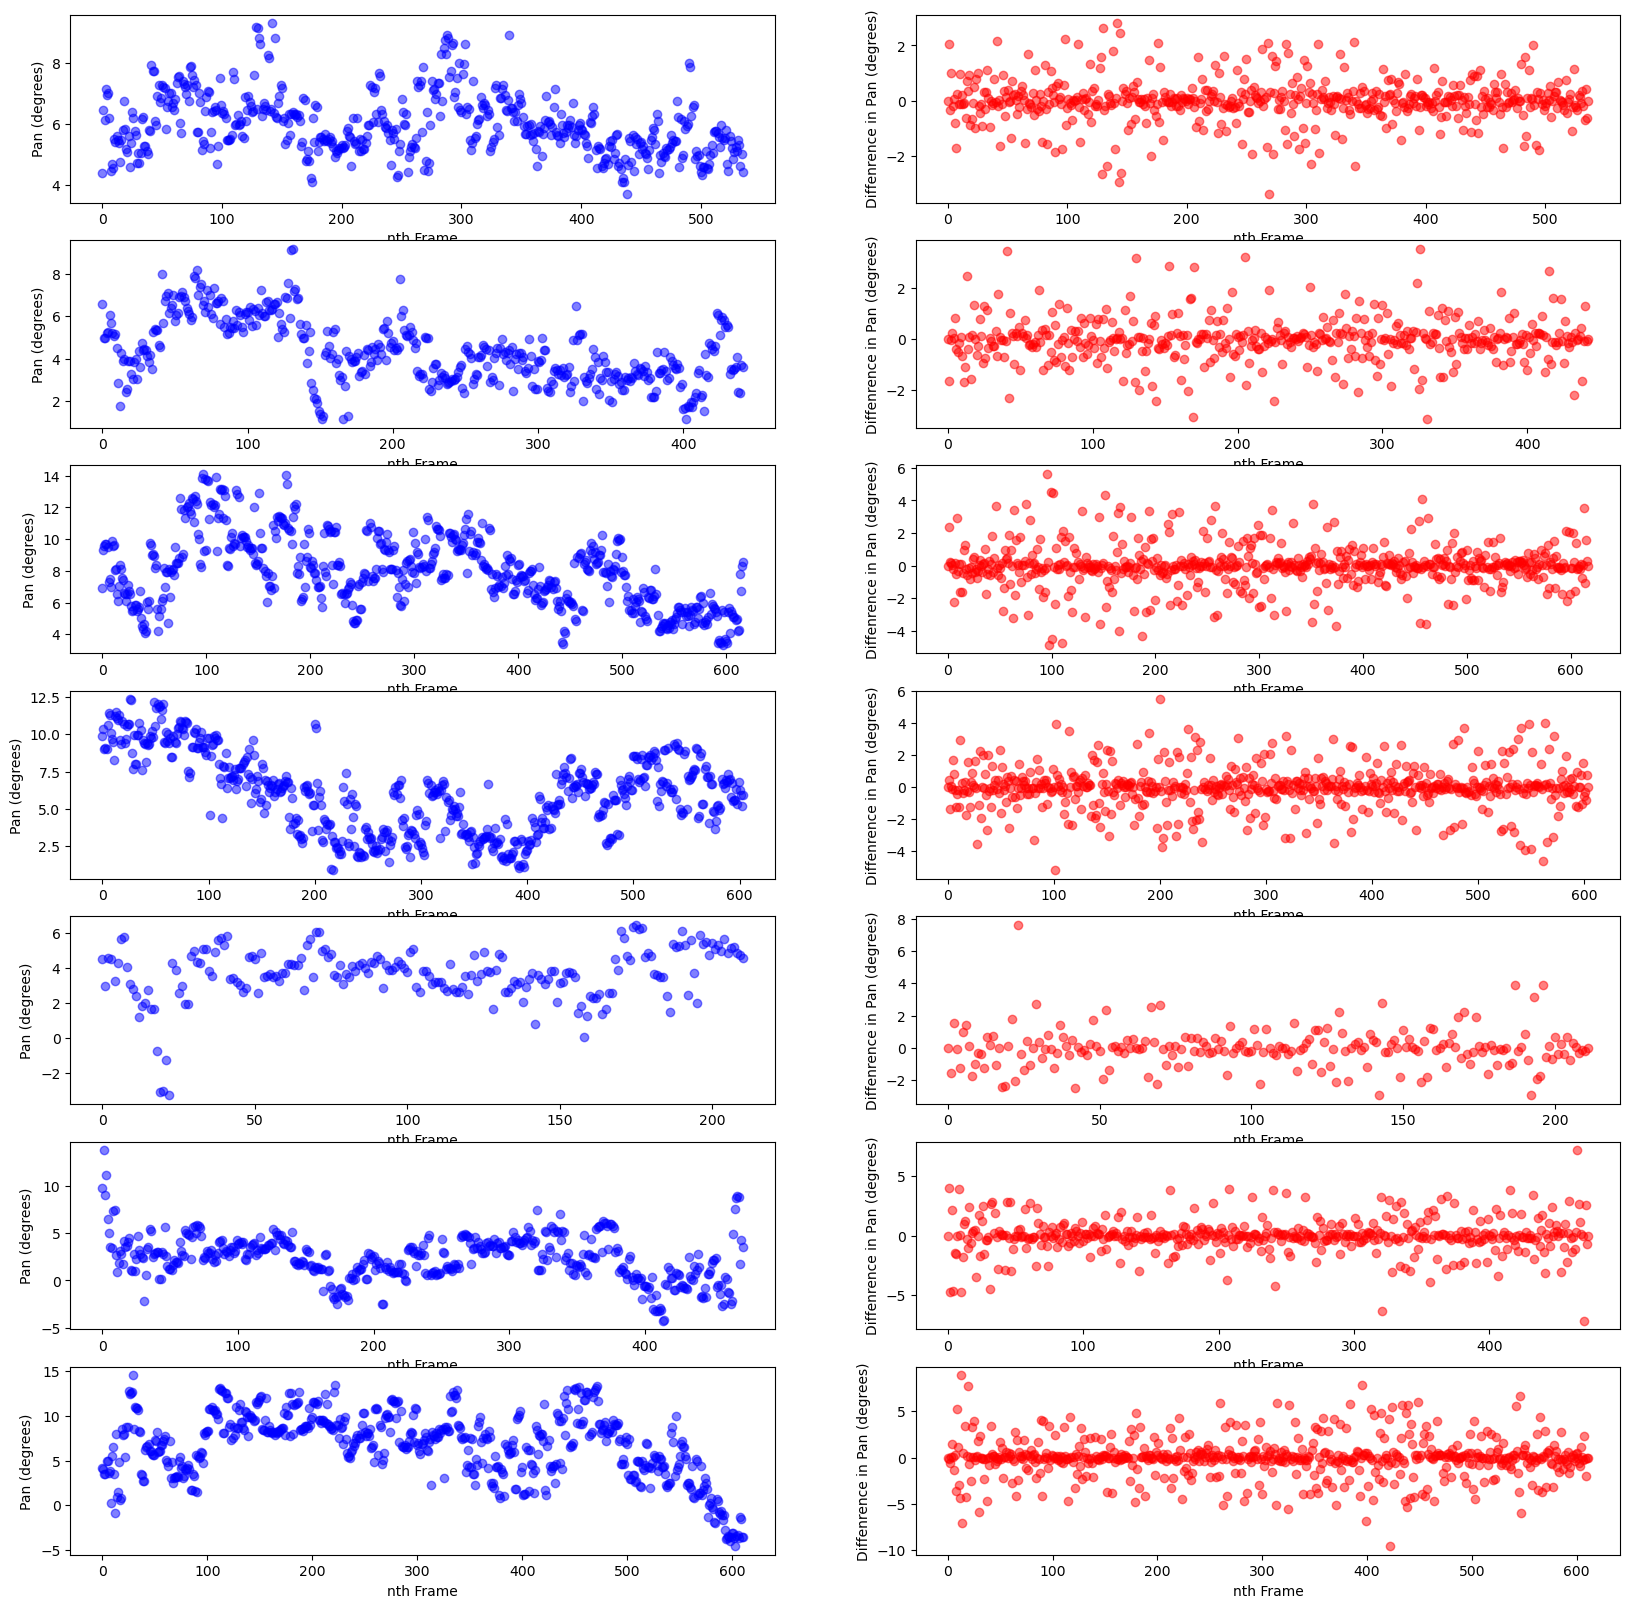

In [16]:
plot_fig("p1")

In [39]:
# train the COPOD detector
from pyod.models.copod import COPOD

clf_tilts_only = COPOD()
clf_multivariate = COPOD()

tilts = np.load(f"{results_arrays_path}\\1\\{1}_tilts_1.npy")
tilts_diff = np.ediff1d(tilts, to_begin=0)
pans = np.load(f"{results_arrays_path}\\1\\{1}_pans_1.npy")
pans_diff = np.ediff1d(pans, to_begin=0)

X_train = np.vstack((tilts, tilts_diff)).T

clf_tilts_only.fit(X_train)


X_train = np.vstack((tilts, tilts_diff, pans, pans_diff)).T
clf_multivariate.fit(X_train)

COPOD(contamination=0.1, n_jobs=1)

In [88]:
def get_potential_frames(scores):
    indices = np.argsort(-scores)
    a = (200 < indices) & (indices < 300)
    valid_pairs = []
    for ind in indices[a]:
        score = scores[ind]
        valid_pairs.append((score, ind, np.where(indices == ind)[0][0]))
    valid_pairs = pd.DataFrame(valid_pairs, columns=['score', 'frame', 'rank'])
    print(valid_pairs[valid_pairs['rank'] < valid_pairs['rank'].quantile(0.1)])

In [89]:
get_potential_frames(clf_tilts_only.decision_scores_)

      score  frame  rank
0  7.527200    263     3
1  6.536659    208     4
2  6.343710    209     8
3  5.474864    204    15
4  5.306911    274    18
5  5.283815    214    19
6  5.150688    217    21
7  4.829345    210    27
8  4.685250    271    34
9  4.618824    221    36


In [90]:
get_potential_frames(clf_multivariate.decision_scores_)

       score  frame  rank
0  11.839487    263     3
1  10.294142    208     7
2  10.262304    269     8
3   9.621029    255    14
4   9.510778    272    16
5   8.909913    209    23
6   8.745301    214    28
7   8.396501    288    32
8   8.257449    283    37
9   8.133468    285    39


Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.
